## import libraries

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## load data

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   Glucose           763 non-null    float64
 2   BloodPressure     733 non-null    float64
 3   SkinThickness     541 non-null    float64
 4   Insulin           394 non-null    float64
 5   BMI               757 non-null    float64
 6   DiabetesPedigree  768 non-null    float64
 7   Age               768 non-null    int64  
 8   Outcome           768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


## fill na's with mean value of each column

In [7]:
df = df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   Glucose           768 non-null    float64
 2   BloodPressure     768 non-null    float64
 3   SkinThickness     768 non-null    float64
 4   Insulin           768 non-null    float64
 5   BMI               768 non-null    float64
 6   DiabetesPedigree  768 non-null    float64
 7   Age               768 non-null    int64  
 8   Outcome           768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


## Check whether any na left

In [10]:
df.isna().any().any()

np.False_

In [11]:
df.shape

(768, 9)

## Display 5 rows of cleaned df

df.head(5)

In [25]:
sub_df = df[['Glucose', 'Insulin', 'BloodPressure', 'BMI', 'Age', 'Outcome']]
corr_matrix = sub_df.corr()
corr_matrix

,Glucose,Insulin,BloodPressure,BMI,Age,Outcome
Glucose,1.000000,0.420157,0.218367,0.230941,0.266534,0.492928
Insulin,0.420157,1.000000,0.072517,0.166586,0.136734,0.214411
BloodPressure,0.218367,0.072517,1.000000,0.281268,0.324595,0.166074
BMI,0.230941,0.166586,0.281268,1.000000,0.025519,0.311924
Age,0.266534,0.136734,0.324595,0.025519,1.000000,0.238356
Outcome,0.492928,0.214411,0.166074,0.311924,0.238356,1.000000


## Plot corr matrix heat map

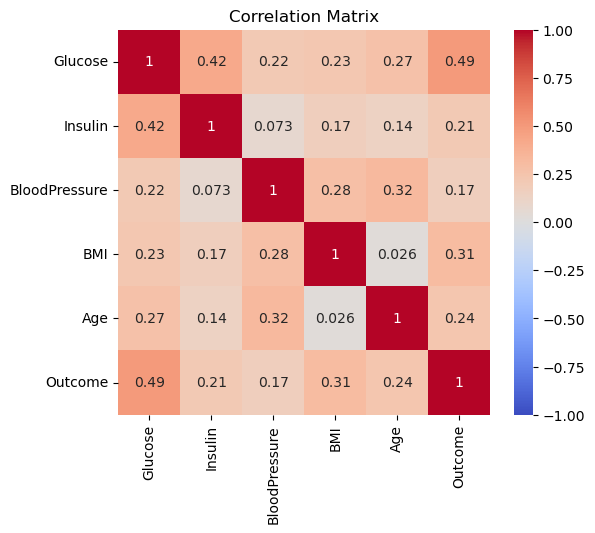

In [29]:
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

## Which feature causes diabetes mose

In [37]:
corr_matrix[['Outcome']].drop('Outcome').idxmax(), corr_matrix[['Outcome']].drop('Outcome').max()

(Outcome    Glucose
 dtype: object,
 Outcome    0.492928
 dtype: float64)